# Business objective - Review Analysis of Product

### Most of the people are expressing their view by posting it on social platforms about a product. We need to understand the liking or disliking of that product to help the organization to make some decisions about the production and supply of the same in the market. So here consider extracting reviews from ecommerce websites and analyze them to satisfy the objective

## Product used :-IFB 6 Kg 5 Star Fully Automatic Front Loading Washing Machine
<img src="https://m.media-amazon.com/images/I/71JgqNxxuBL._SL1500_.jpg" style="width: 300px;">


In [1]:
# installing the Beautifulsoup library for scraping
# pip install beautifulsoup4

In [2]:
# Installing lxml for parsing
# pip install lxml

In [9]:
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import warnings
warnings.filterwarnings(action="ignore")

In [11]:
# # Creating the empty list for storing reviews
# review_list=[]

In [12]:
# # Defining the function to create soup object
# def get_soup(url):
#     source= requests.get(url).text
#     soup= BeautifulSoup(source, "lxml")
#     return soup

In [13]:
# # function to extract Review title, rating and review
# def get_reviews(soup):
#     reviews= soup.find_all("div",{"data-hook":"review"})
#     try:
#         for item in reviews:
#             review = {
#             "r_title" : item.find("a", {"data-hook":"review-title"}).text.strip(),
#             "r_rating" : item.find("i", {"data-hook" : "review-star-rating"}).text,
#             "r_review ": item.find("span", {"data-hook":"review-body"}).text
#             }
#             review_list.append(review)
#     except:
#         pass

In [14]:
# for i in range (2, 150, 1):
#     soup= get_soup("https://www.amazon.in/IFB-Fully-Automatic-Diva-Aqua-SX/product-reviews/B071G3B81W/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i))
#     get_reviews(soup)
#     print(len(review_list))

In [15]:
# df= pd.DataFrame(review_list)
# df.head()

In [16]:
# df.shape

In [17]:
df=pd.read_excel("C:\\Users\\STUDENT\\Desktop\\New folder\Washing machine_mixed\\Raw_Reviews_WM.xlsx")

In [18]:
df.head()

,Unnamed: 0,r_title,r_rating,r_review
0,0,Got repaired 3 times within 4-6 months :(,3.0 out of 5 stars,\n\n Got repaired 3 times in the span of 4 to...
1,1,useless completely not an user friendly device,1.0 out of 5 stars,\n\n Not an user friendly device requires com...
2,2,Very very good but not stable.,5.0 out of 5 stars,\n\n The machine is very good no doubt.Washin...
3,3,Voltage hi low errer and ifb service,1.0 out of 5 stars,\n\n Before it I am using LG washing machine ...
4,4,Great,5.0 out of 5 stars,\n\n Nice value for money\n\n


In [19]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [22]:
df["rating"]= df["r_rating"].apply(lambda x : int(x[0]))
df.drop("r_rating", axis=1, inplace=True)
df.head()

,r_title,r_review,rating
0,Got repaired 3 times within 4-6 months :(,\n\n Got repaired 3 times in the span of 4 to...,3
1,useless completely not an user friendly device,\n\n Not an user friendly device requires com...,1
2,Very very good but not stable.,\n\n The machine is very good no doubt.Washin...,5
3,Voltage hi low errer and ifb service,\n\n Before it I am using LG washing machine ...,1
4,Great,\n\n Nice value for money\n\n,5


In [29]:
df_title = df[["r_title","rating"]]
df_title.columns=["Review", "rating"]
df_title.head()

,Review,rating
0,Got repaired 3 times within 4-6 months :(,3
1,useless completely not an user friendly device,1
2,Very very good but not stable.,5
3,Voltage hi low errer and ifb service,1
4,Great,5


In [30]:
df_rev = df[["r_review ","rating"]]
df_rev.columns=["Review", "rating"]
df_rev.head()

,Review,rating
0,\n\n Got repaired 3 times in the span of 4 to...,3
1,\n\n Not an user friendly device requires com...,1
2,\n\n The machine is very good no doubt.Washin...,5
3,\n\n Before it I am using LG washing machine ...,1
4,\n\n Nice value for money\n\n,5


In [47]:
df1= pd.concat([df_title, df_rev], axis=0).reset_index(drop=True)
df1.head()

,Review,rating
0,Got repaired 3 times within 4-6 months :(,3
1,useless completely not an user friendly device,1
2,Very very good but not stable.,5
3,Voltage hi low errer and ifb service,1
4,Great,5


In [43]:
print(df_title.shape)
print(df1.shape)

(1050, 2)
(2100, 2)


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  2095 non-null   object
 1   rating  2100 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 32.9+ KB


In [48]:
df1["length"]=df1["Review"].apply(lambda x:len(str(x)))
df1.head()

,Review,rating,length
0,Got repaired 3 times within 4-6 months :(,3,41
1,useless completely not an user friendly device,1,46
2,Very very good but not stable.,5,30
3,Voltage hi low errer and ifb service,1,36
4,Great,5,5


In [49]:
df1.rating.value_counts().sort_index()

1    498
2     82
3    164
4    402
5    954
Name: rating, dtype: int64

<AxesSubplot:ylabel='rating'>

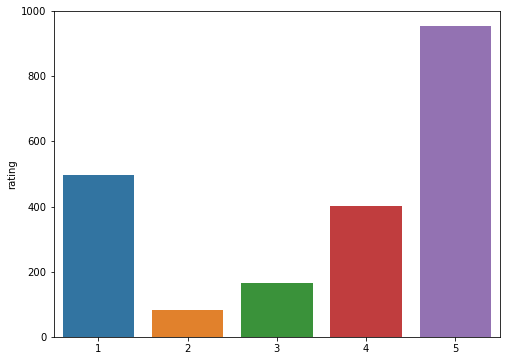

In [51]:
plt.figure(figsize=(8,6))
sns.barplot(x=df1.rating.value_counts().index, y=df1.rating.value_counts())

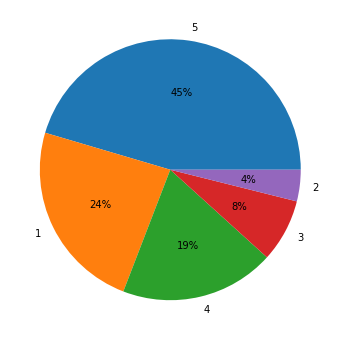

In [53]:
plt.figure(figsize=(8,6))
plt.pie(df1.rating.value_counts(), labels=df1.rating.value_counts().index,autopct='%.0f%%')
plt.show()

In [56]:
df2 = df1[df1["rating"]!=3]

In [57]:
df2.head()

,Review,rating,length
1,useless completely not an user friendly device,1,46
2,Very very good but not stable.,5,30
3,Voltage hi low errer and ifb service,1,36
4,Great,5,5
5,very worst service experience by IFB installat...,1,53


In [58]:
df2.shape

(1936, 3)

In [59]:
import warnings
warnings.filterwarnings(action="ignore")

In [60]:
# Lets Consider rating of 1 and 2 as Negative review , and considering Negative review as 0
# Lets Consider rating of 4, 5 as Positive Review , and conidering Positive review as 1

df2["sentiment"]= df2["rating"].map({1: 0, 2:0, 4: 1, 5:1})

In [61]:
df2.head()

,Review,rating,length,sentiment
1,useless completely not an user friendly device,1,46,0
2,Very very good but not stable.,5,30,1
3,Voltage hi low errer and ifb service,1,36,0
4,Great,5,5,1
5,very worst service experience by IFB installat...,1,53,0


In [62]:
df2.sentiment.value_counts()

1    1356
0     580
Name: sentiment, dtype: int64

<AxesSubplot:ylabel='sentiment'>

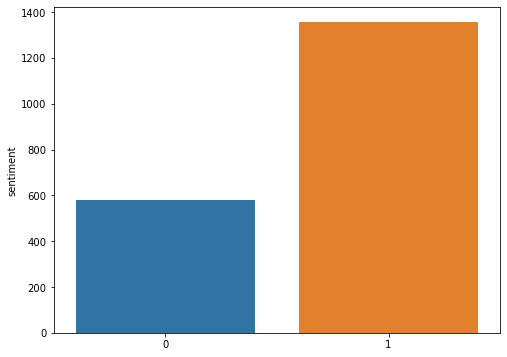

In [63]:
plt.figure(figsize=(8,6))
sns.barplot(x=df2.sentiment.value_counts().index, y=df2.sentiment.value_counts())

<AxesSubplot:xlabel='length', ylabel='Count'>

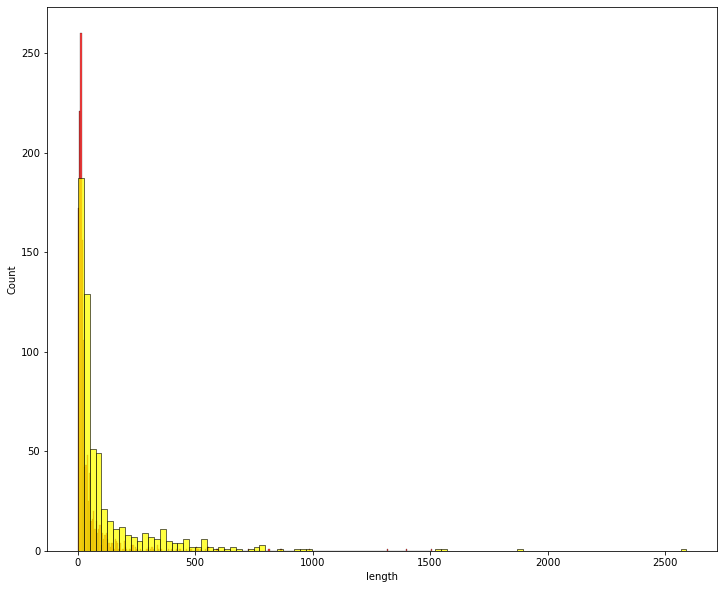

In [68]:
plt.figure(figsize=(12,10))
sns.histplot(df2[df2["sentiment"]==1]['length'], color="red")
sns.histplot(df2[df2["sentiment"]==0]['length'], color="yellow")

In [70]:
df2.corr()

,rating,length,sentiment
rating,1.000000,-0.229059,0.967404
length,-0.229059,1.000000,-0.234377
sentiment,0.967404,-0.234377,1.000000


In [71]:
import re
from nltk.stem import PorterStemmer , WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

In [72]:
#lemmatizer=WordNetLemmatizer()
#port = PorterStemmer()

In [73]:
def text_cleaner (text):
    cleaned= re.sub('[^a-zA-Z]', " ", text) 
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    #cleaned= [port.stem (word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    return cleaned

In [75]:
df2["Cleaned_review"]=df2["Review"].apply(lambda x: text_cleaner(str(x)))
df2.head()

,Review,rating,length,sentiment,Cleaned_review
1,useless completely not an user friendly device,1,46,0,useless completely not an user friendly device
2,Very very good but not stable.,5,30,1,very very good but not stable
3,Voltage hi low errer and ifb service,1,36,0,voltage hi low errer and ifb service
4,Great,5,5,1,great
5,very worst service experience by IFB installat...,1,53,0,very worst service experience by ifb installat...


In [76]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

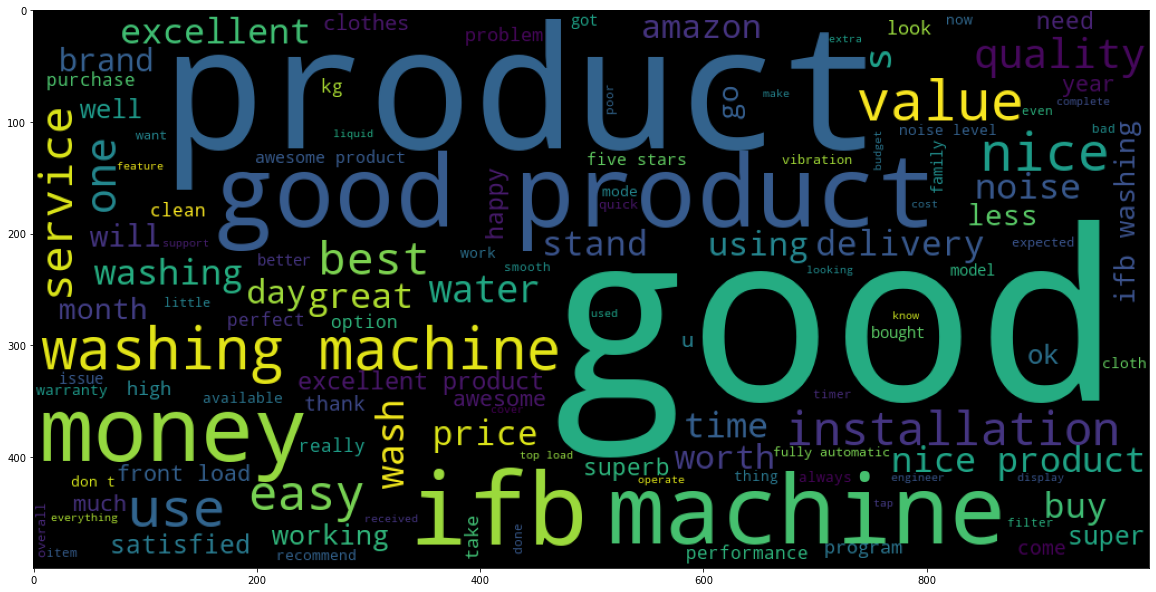

In [80]:
wc = WordCloud(width=1000,height=500, min_font_size=10)
wc_pos=wc.generate(df2[df2["sentiment"]==1]["Cleaned_review"].str.cat(sep=" "))
plt.figure(figsize=(20,20))
plt.imshow(wc_pos)

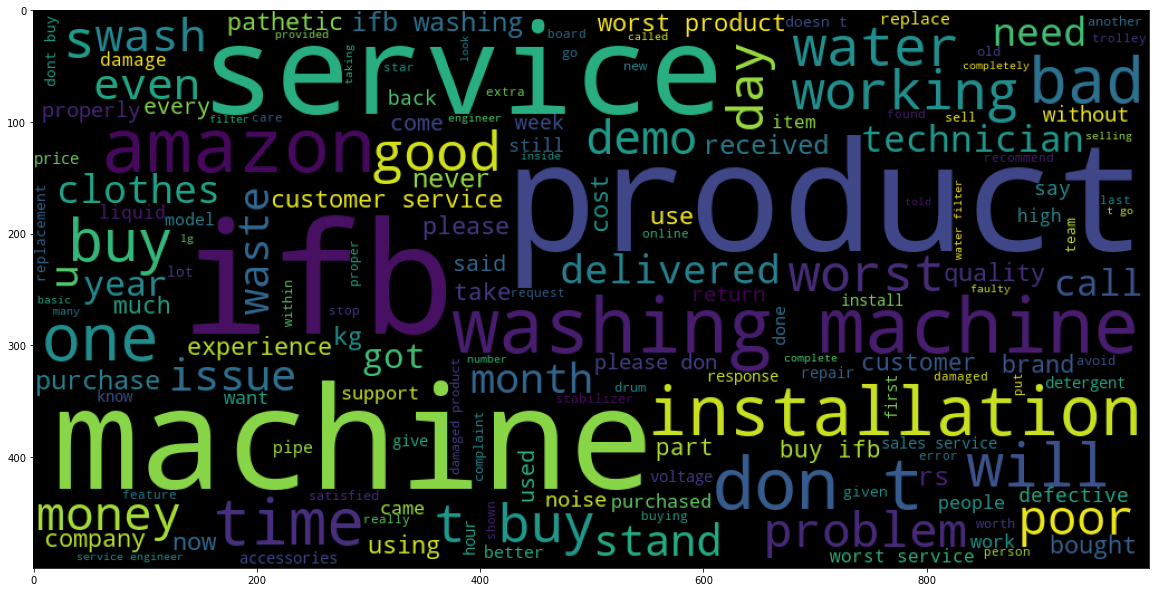

In [79]:
wc = WordCloud(width=1000,height=500, min_font_size=10)
wc_neg = wc.generate(df2[df2["sentiment"]==0]["Cleaned_review"].str.cat(sep=" "))
plt.figure(figsize=(20,20))
plt.imshow(wc_neg)

In [211]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer(binary=True)
#tfidf= TfidfVectorizer(max_features=1000)

In [212]:
X =cv.fit_transform(df2["Cleaned_review"]).toarray()

In [213]:
X.shape

(1936, 2553)

In [214]:
y= df2["sentiment"].values
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [216]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [217]:
from sklearn.naive_bayes import BernoulliNB , GaussianNB, MultinomialNB

In [218]:
bnb = BernoulliNB()
gnb= GaussianNB()
mnb= MultinomialNB()

In [219]:
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 42  78]
 [ 22 246]]


0.7422680412371134
0.7592592592592593


In [220]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 64  56]
 [ 16 252]]


0.8144329896907216
0.8181818181818182


In [221]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 88  32]
 [ 18 250]]


0.8711340206185567
0.8865248226950354


In [222]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)
lr.fit(X_train, y_train)
y_pred =lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 88  32]
 [ 20 248]]


0.865979381443299
0.8857142857142857


In [223]:
from sklearn.svm import SVC
svc = SVC(C=10, kernel='rbf')
svc.fit(X_train, y_train)
y_pred =svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 93  27]
 [ 31 237]]


0.8505154639175257
0.8977272727272727


In [224]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [225]:
rf= RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train,y_train)
y_pred =rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 91  29]
 [ 21 247]]


0.8711340206185567
0.894927536231884


In [226]:
ad= AdaBoostClassifier(n_estimators=500 , random_state=42)
ad.fit(X_train, y_train)
y_pred =ad.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 92  28]
 [ 24 244]]


0.865979381443299
0.8970588235294118


In [227]:
gb = GradientBoostingClassifier(n_estimators=500, random_state=42,learning_rate=0.01)
gb.fit(X_train, y_train)
y_pred =gb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 60  60]
 [ 13 255]]


0.8118556701030928
0.8095238095238095


In [228]:
etc= ExtraTreesClassifier(n_estimators=500)
etc.fit(X_train, y_train)
y_pred =etc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[ 93  27]
 [ 27 241]]


0.8608247422680413
0.8992537313432836


In [229]:
etc= ExtraTreesClassifier(n_estimators=500)
etc.fit(X, y)

ExtraTreesClassifier(n_estimators=500)

In [230]:
from sklearn.ensemble import VotingClassifier

In [231]:
estimator = []
estimator.append(('LR', LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 200)))

estimator.append(('etc', ExtraTreesClassifier(n_estimators=500)))

estimator.append(('rf',RandomForestClassifier(n_estimators=500, random_state=42) ))

estimator.append(('mnb',MultinomialNB() ))

In [246]:
vot_hard1= VotingClassifier(estimators = estimator, voting ='hard')
vot_hard1.fit(X, y)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(max_iter=200,
                                                 multi_class='multinomial')),
                             ('etc', ExtraTreesClassifier(n_estimators=500)),
                             ('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=42)),
                             ('mnb', MultinomialNB())])

In [233]:
rf.fit(X,y)
lr.fit(X,y)
mnb.fit(X,y)

MultinomialNB()

In [234]:
text="not good"
cleaned= text_cleaner(text)
cleaned
cv1=cv.transform([cleaned])

In [235]:
etc.predict(cv1)

array([0], dtype=int64)

In [236]:
rf.predict(cv1)

array([0], dtype=int64)

In [237]:
lr.predict(cv1)

array([1], dtype=int64)

In [238]:
mnb.predict(cv1)

array([1], dtype=int64)

In [239]:
vot_hard.predict(cv1)

array([0], dtype=int64)

In [250]:
import pickle

In [251]:
file = open("C:\\Users\\STUDENT\\Desktop\\New folder\Washing machine_mixed\\New folder\\votc.pkl","wb")
pickle.dump(vot_hard1 , file)

In [249]:
file1 = open("C:\\Users\\STUDENT\\Desktop\\New folder\Washing machine_mixed\\New folder\\vect.pkl","wb")
pickle.dump(cv , file1)

In [186]:
df1.to_excel("C:\\Users\\STUDENT\\Desktop\\New folder\Washing machine_mixed\\Washinmachine.xlsx")